In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('mymoviedb.csv',lineterminator = '\n')

In [74]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [76]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [77]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [78]:
df.duplicated().sum()

np.int64(0)

In [79]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Exploration Summary
:we have a dataframe consisting of 9827 rows and 9 columns .
:our dataset looks a bit tiday with no NaNs nor duplicated values.
:release_date column needs to be casted into date time and to extract only the year value.
:overview, origanl language and poster-url wouldn`t be so useful during analysis,so we'll drop them.
:there is noticable outliers in popularity column.
:vote_average better be categorised for proper analysis.
:genre column has comma saperated values and white spaces that needs to be handled and casted into category.Exploration Summary. 

In [80]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [81]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [82]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# dropping the columns

In [83]:
cols = ['Overview','Original_Language','Poster_Url']

In [84]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [85]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# categorizing vote_average column


we would cut the vote_average values and make 4 categories: popular average below_avg not_popular to discribe it more using categorize_col() function provided above

In [86]:
def categorize_col(df, col, labels):
    desc = df[col].describe()
    edges = [desc['min'], 
             desc['25%'],
             desc['50%'],
             desc['75%'], 
             desc['max']]
    df[col + '_category'] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df


In [87]:
df['Vote_Average'].value_counts()


Vote_Average
6.4     435
6.3     429
6.5     427
6.8     423
6.7     420
       ... 
9.2       1
1.8       1
2.4       1
2.6       1
10.0      1
Name: count, Length: 74, dtype: int64

In [88]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [89]:
df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [90]:
df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [91]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25793 non-null  float64 
 5   Genre         25793 non-null  category
dtypes: category(1), float64(2), int32(1), int64(1), object(1)
memory usage: 933.4+ KB


In [93]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


# Data Visualization

In [94]:
sns.set_style('whitegrid')

# what is the most frequent genre of movies released on netfilx?

In [95]:
df['Genre'].describe()

count         25793
unique           38
top        Thriller
freq           1973
Name: Genre, dtype: object

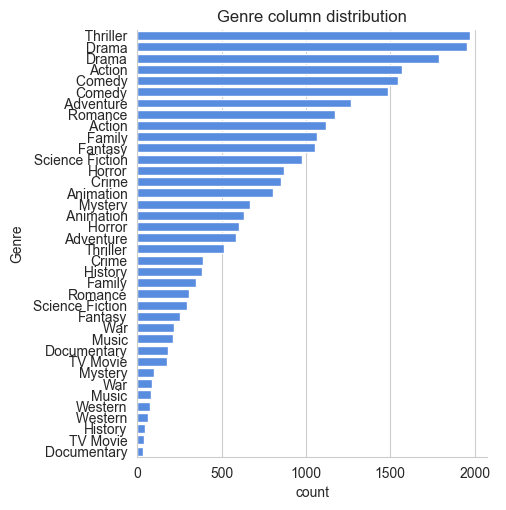

In [96]:
sns.catplot(y = 'Genre',data = df,kind = 'count',
           order = df['Genre'] .value_counts().index,
           color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

# which has highest votes in vote count colum?

In [108]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


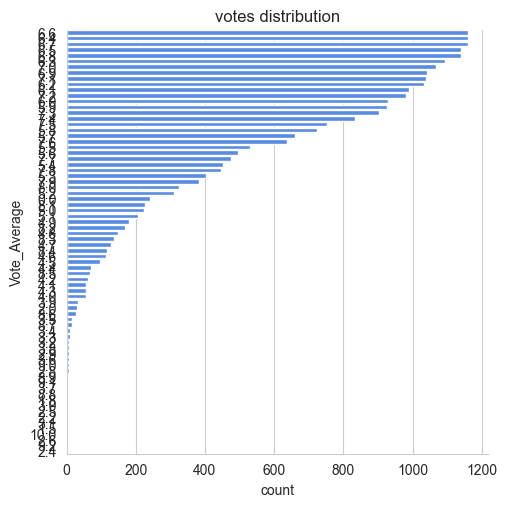

In [109]:
sns.catplot(y = 'Vote_Average',data = df, kind = 'count',
           order = df['Vote_Average'].value_counts().index,
           color = '#4287f5')
plt.title('votes distribution')

plt.show()

# what movie got the highest popularity? whats its genre?

In [101]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [111]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction


# what movie got the lowest Popularity? whats it genre?

In [113]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,6.7,History
25790,1984,Threads,13.354,186,7.8,War
25791,1984,Threads,13.354,186,7.8,Drama
25792,1984,Threads,13.354,186,7.8,Science Fiction


# which year has the most filmmed movies?

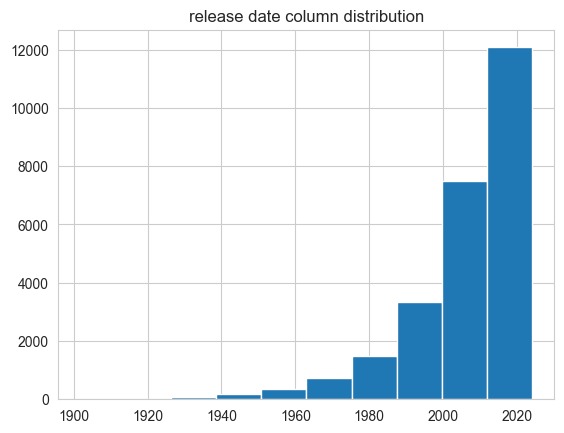

In [114]:
df['Release_Date'].hist()
plt.title('release date column distribution')
plt.show()

In [ ]:
conclusion
Q1: what is the most frequent Genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

Q2:what genres has highest votes?
we have 25.5% of our dataset with Popular vote (6520 rows),Drama again gets the Highest popularity among fans by being having more than 18.5% movies 
popularities.
    
Q3:what movie got highest popularity? what its genre?
Spider-man: no way home has the highest popularity rate in our dataset and it has genres of action, Adventure and sience fiction.
    
Q4:what movie got the Lowest popularity ?what its genre?
The united states,thread thas the highest lowest rate in our dataset and it has genre of music,drama,'war','sci-fi' and history.

Q5:which year has the most Filmmed movies?
year 2020 has the highest filming rate in our dataset.    